In [75]:
config_file = 'config_run5.json'

# Eval

In [76]:
import os
import json
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

with open(config_file) as config:
    info = json.load(config)

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= info['simul']['gpu_id']

In [77]:
metric_path = info['output']['metric_path']
df = pd.read_csv(os.path.join(metric_path, 'metric.csv'))

iter = np.array(df['iter'])
C_vec = np.array(df['C_vec'])
C_cs = np.array(df['C_cs'])
En_1 = np.array(df['1-En'])
Em_1 = np.array(df['1-Em'])
eps = np.array(df['eps'])
eps_p = np.array(df['eps_p'])
sig_J = np.array(df['sig_J'])
L1 = np.array(df['L1'])
L2 = np.array(df['L2'])
curlB = np.array(df['curlB'])
BC_loss = np.array(df['BC_loss'])
lambda_BC = np.array(df['lambda_BC'])
Div_loss = np.array(df['Div_loss'])
lambda_div = np.array(df['lambda_div'])
FF_loss = np.array(df['FF_loss'])
lambda_ff = np.array(df['lambda_ff'])
loss = lambda_BC*BC_loss + lambda_div*Div_loss + lambda_ff*FF_loss

metrics = {r'$C_{\text{vec}}$':C_vec,
           r'$C_{\text{CS}}$':C_cs,
           r'$E^{\prime}_{n}$':En_1,
           r'$E^{\prime}_{m}$':Em_1,
           r'$\epsilon$':eps,
           r'$\epsilon_p$':eps_p,
           r'$CW_{\text{sin}}$':sig_J,
           r'$L_1$':L1,
           r'$L_2$':L2,
           r'$|J_B|/|J_b|$':curlB,
           r'$\mathcal{L}_b$':BC_loss,
           r'$w_b$':lambda_BC,
           r'$\mathcal{L}_\text{div}$':Div_loss,
           r'$w_\text{div}$':lambda_div,
           r'$\mathcal{L}_\text{ff}$':FF_loss,
           r'$w_\text{ff}$':lambda_ff,
           r'$w_b\mathcal{L}_b$':lambda_BC*BC_loss,
           r'$w_\text{div}\mathcal{L}_\text{div}$':lambda_div*Div_loss,
           r'$w_\text{ff}\mathcal{L}_\text{ff}$':lambda_ff*FF_loss,
           r'$\mathcal{L}$':loss,}

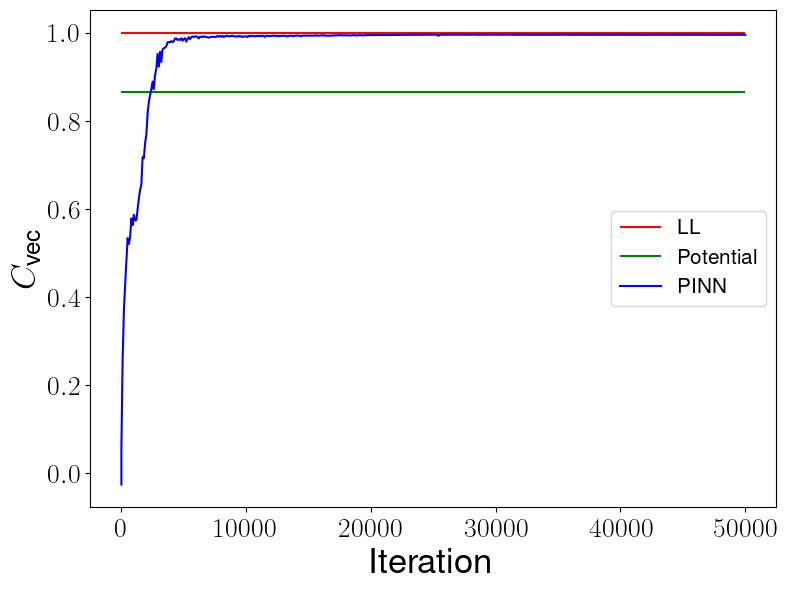

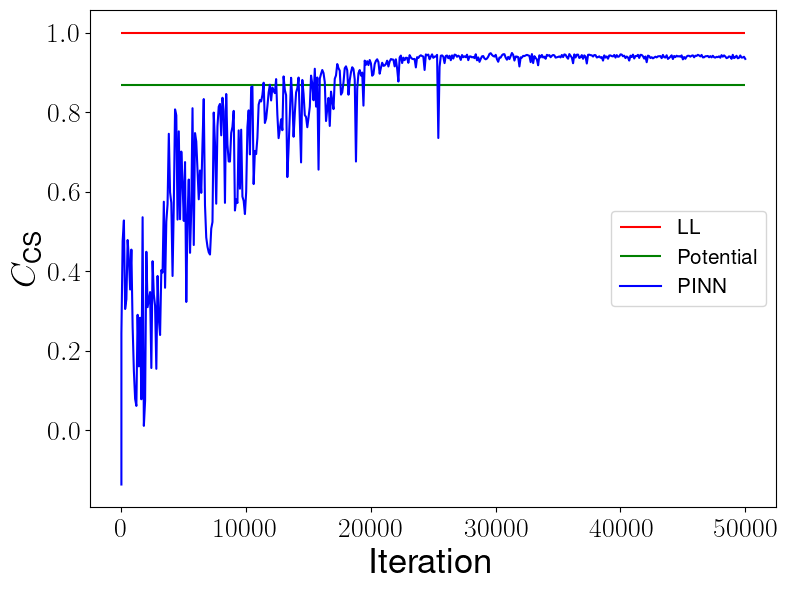

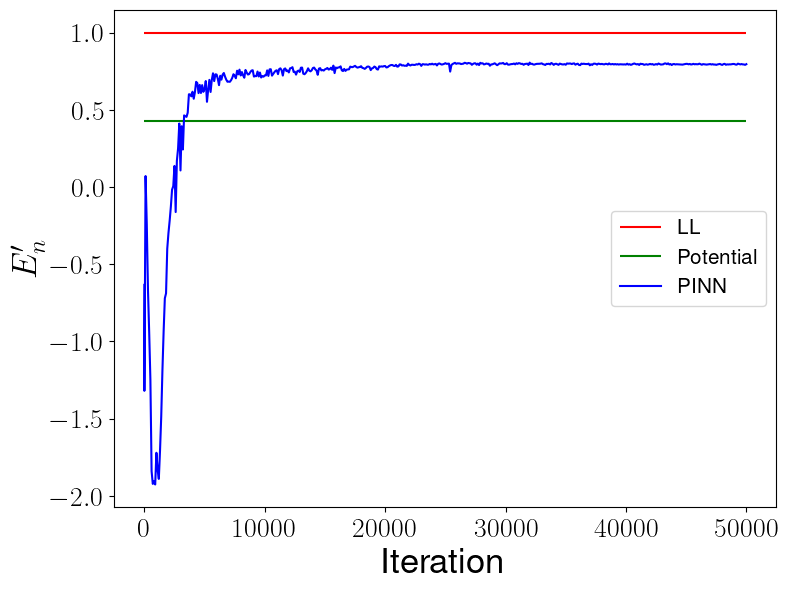

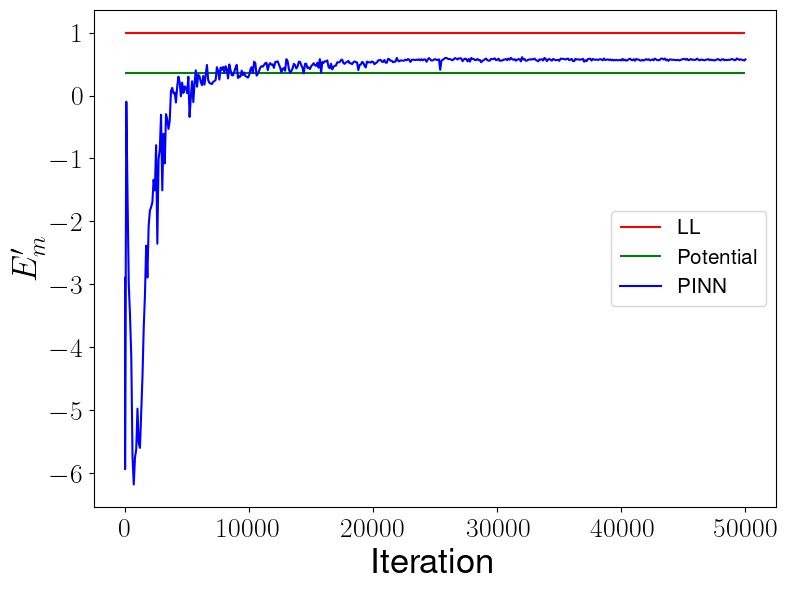

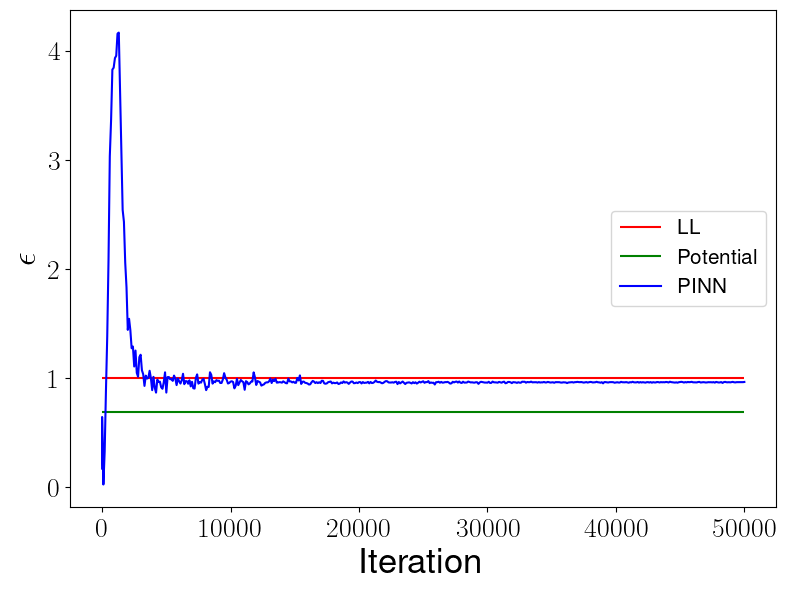

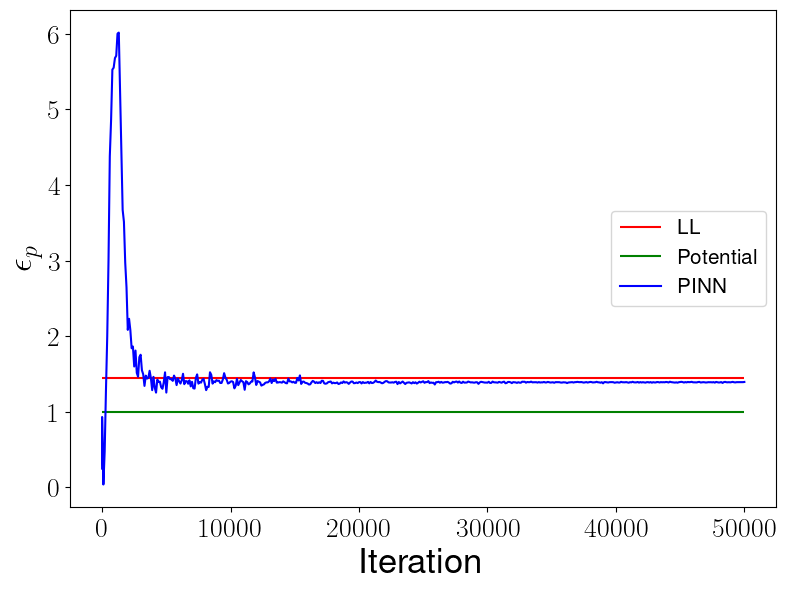

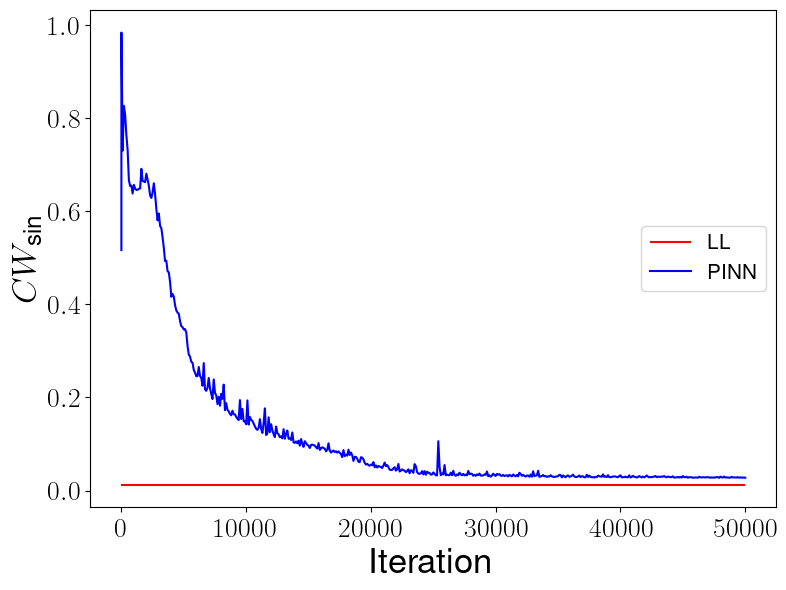

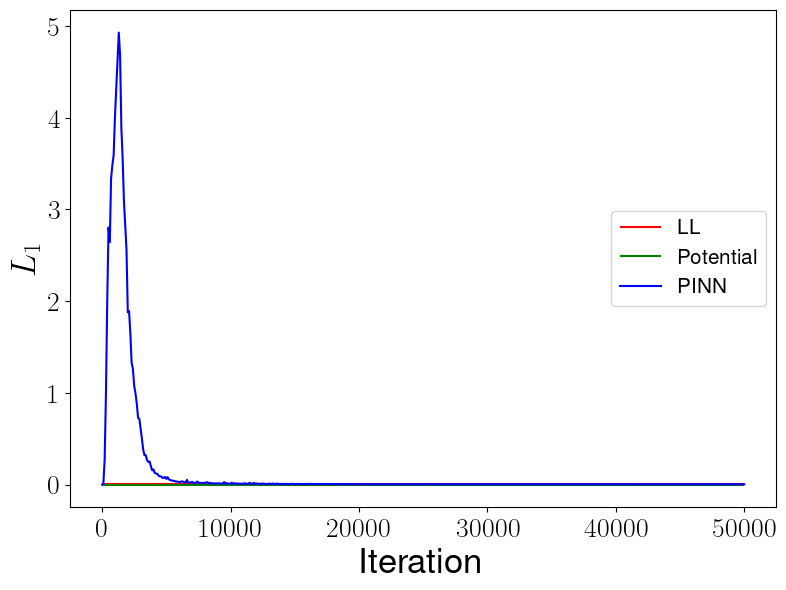

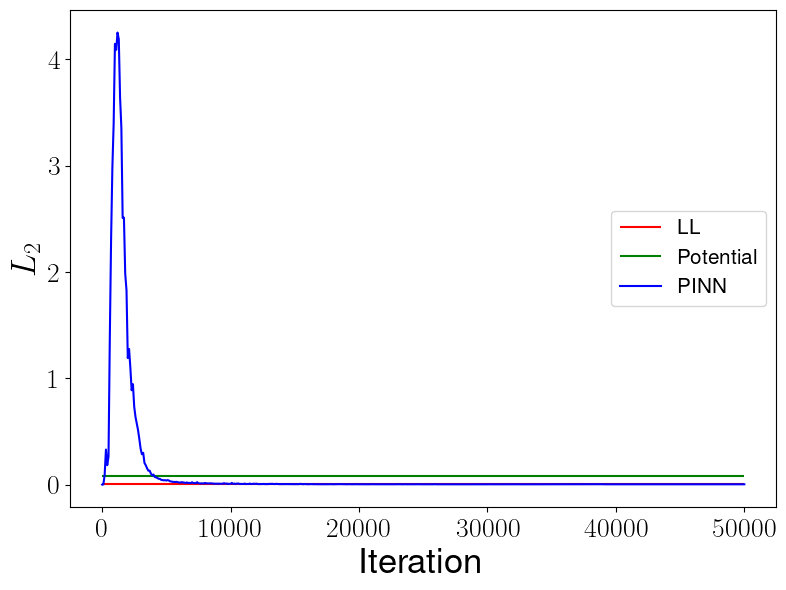

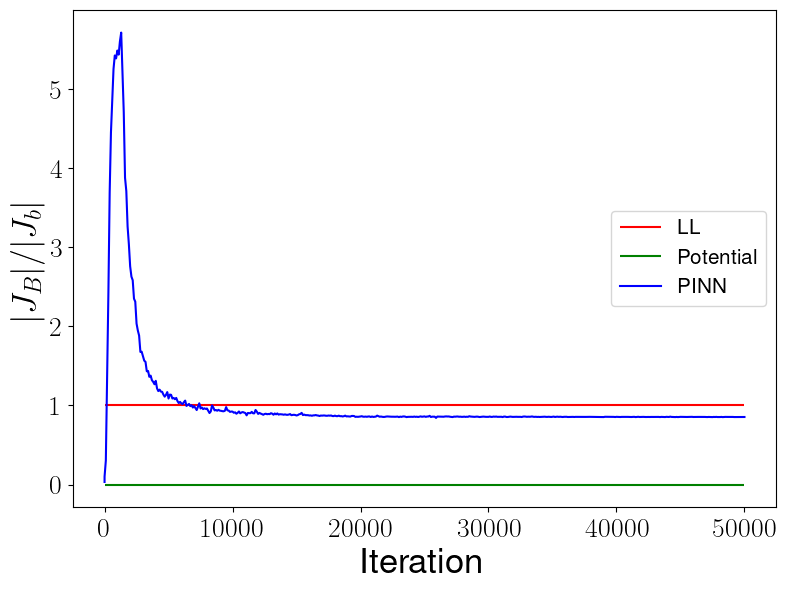

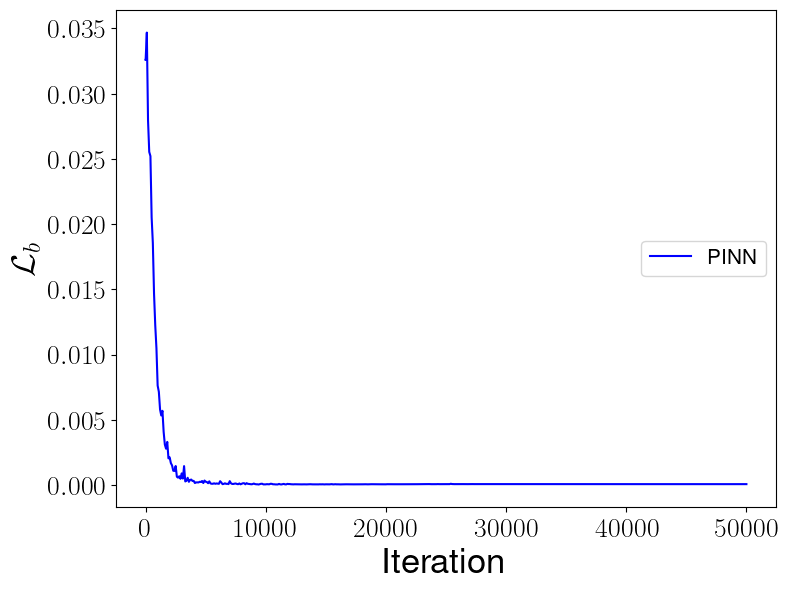

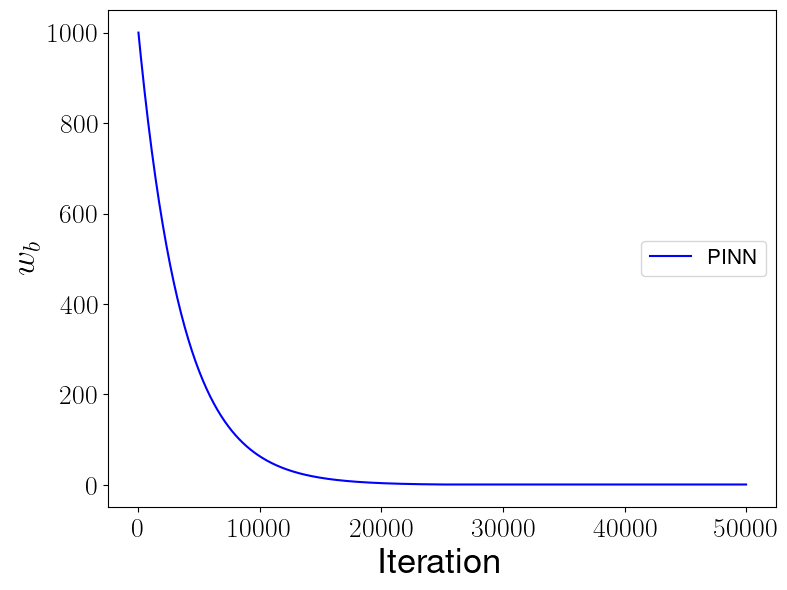

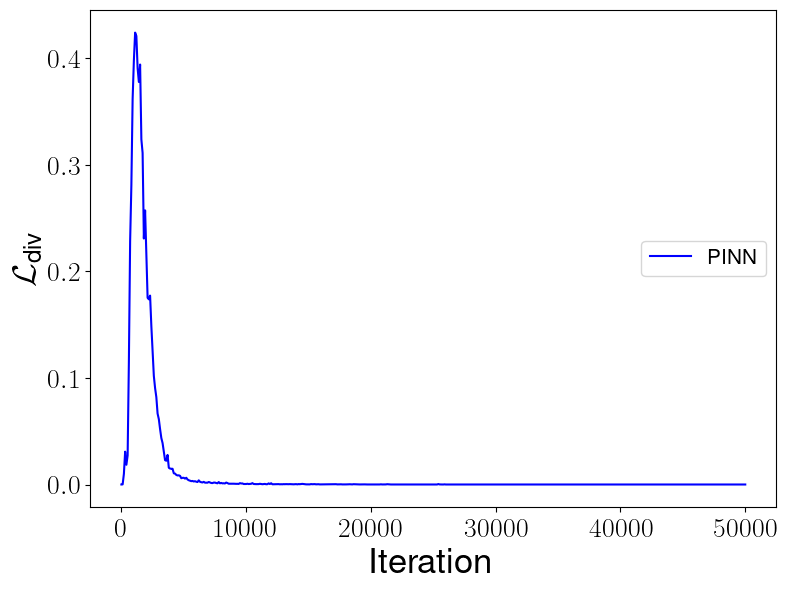

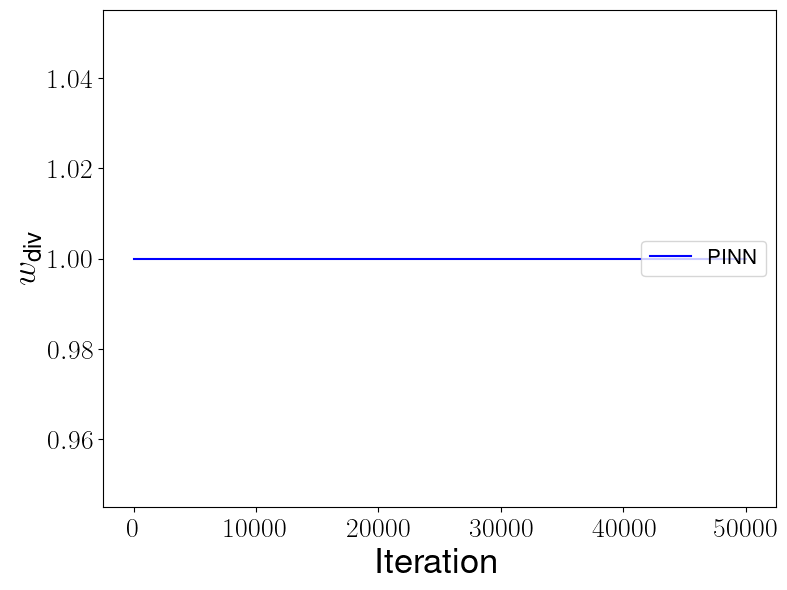

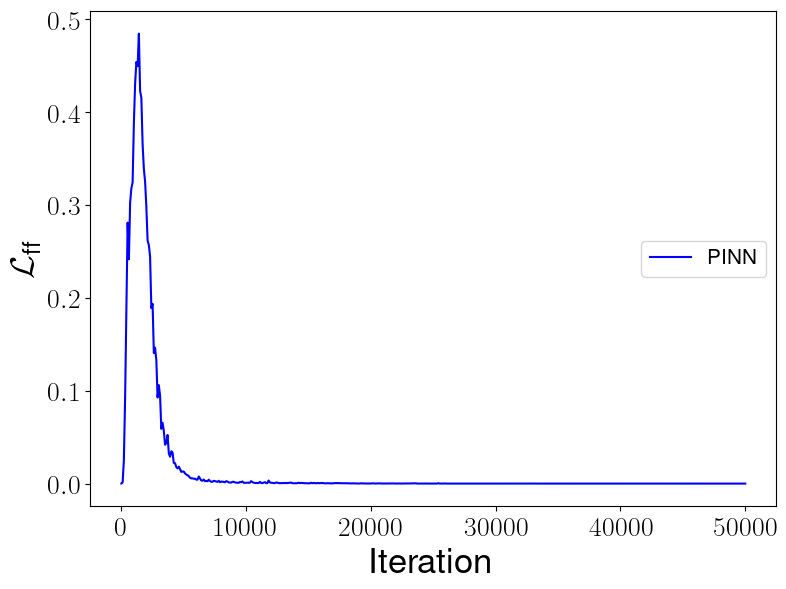

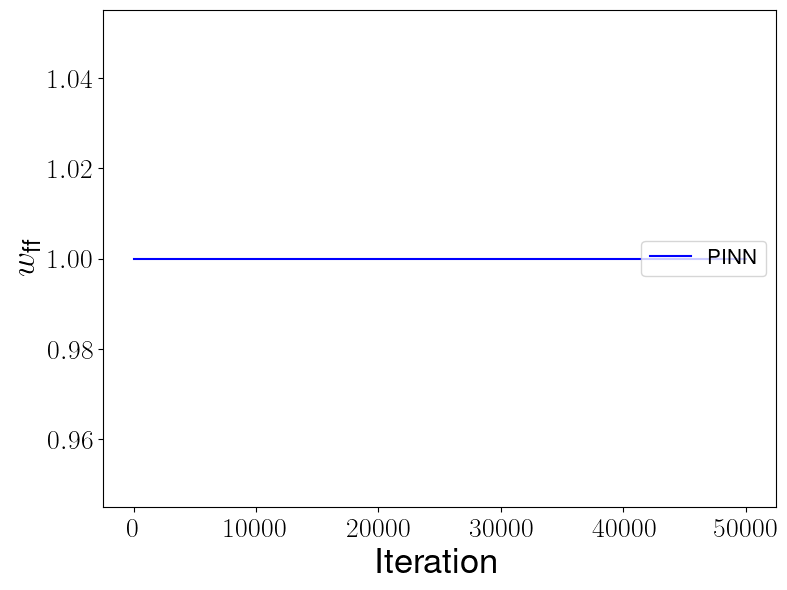

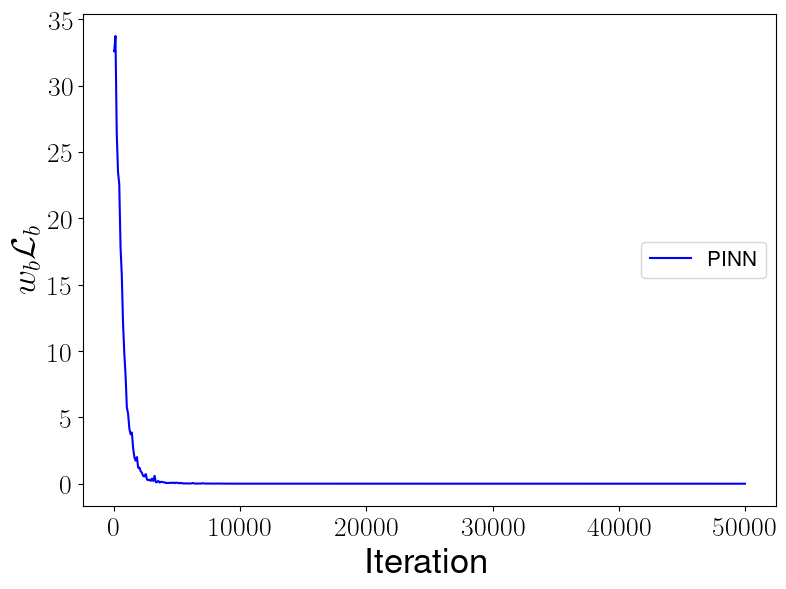

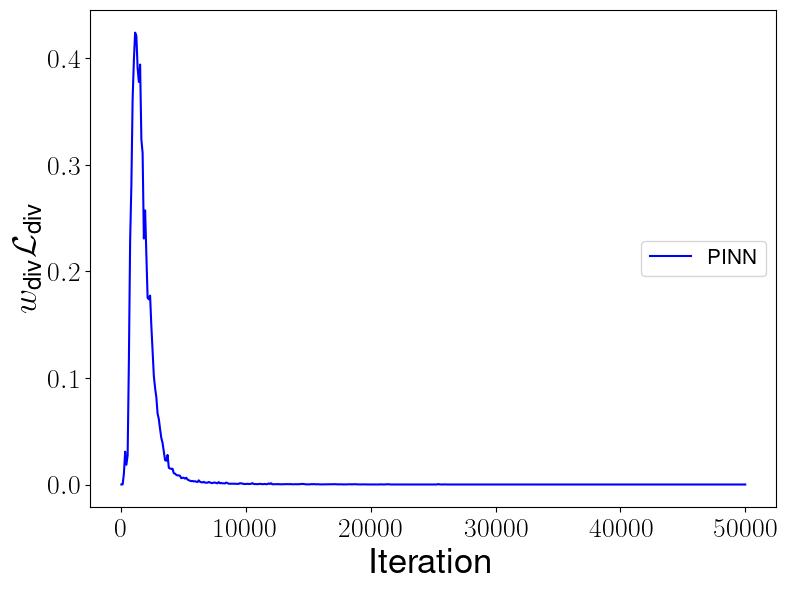

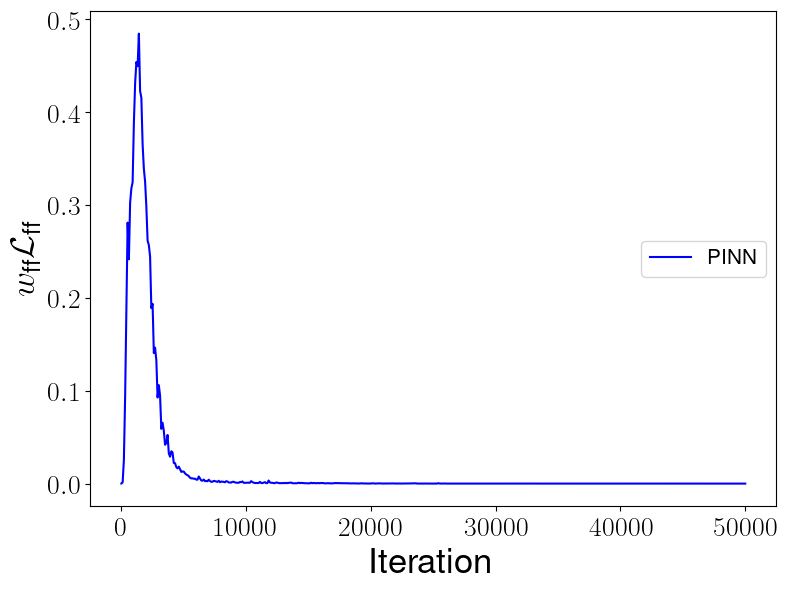

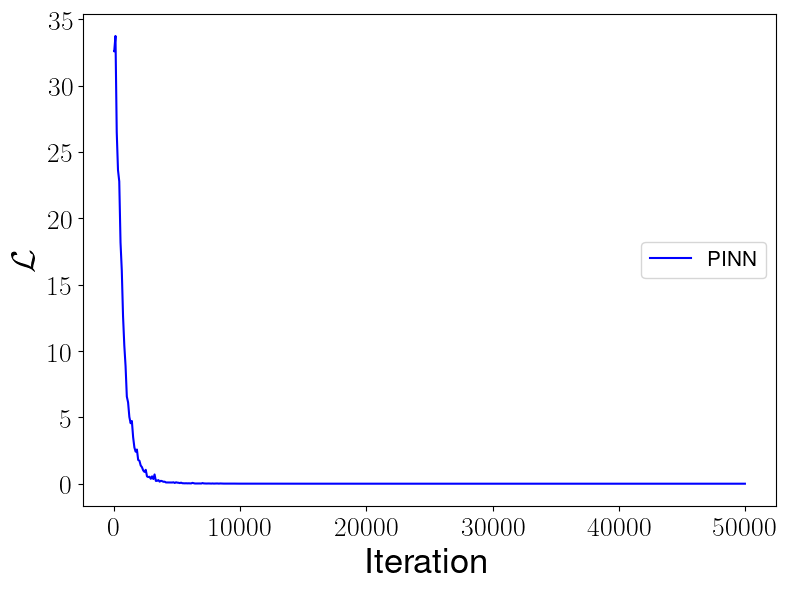

In [78]:
import codecs

def plot_metric(metrics, img_path):
    for label, metric in metrics.items():
        fig, ax = plt.subplots(figsize=(8,6))
        if not (np.isnan(metric[0]) and np.isnan(metric[1])):
            ax.hlines(metric[0], xmin=iter[2], xmax=iter[-1], color='red', label='LL')
            if not (label in [r'$CW_{\text{sin}}$']):
                ax.hlines(metric[1], xmin=iter[2], xmax=iter[-1], color='green', label='Potential')
        ax.plot(iter[2:], metric[2:], color='blue', label='PINN')
        ax.set_ylabel(label, fontsize=25)
        ax.legend(loc='center right', fontsize=15)
        ax.set_xlabel('Iteration', fontsize=25)
        ax.tick_params(axis='both', which='major', labelsize=20)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        label = label.replace('$', '')
        label = label.replace('\\', '')
        label = label.replace('/', '')
        label = codecs.decode(label, 'unicode_escape')
        plt.tight_layout()
        fig.savefig(os.path.join(img_path, f'{label}.png'), dpi=600)

img_path = info['eval']['img_path']
os.makedirs(img_path, exist_ok=False)
plot_metric(metrics, img_path)